In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid" , font_scale=1.5)
pd.set_option("display.max.rows" , None)
pd.set_option("display.max.columns" ,None)

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier ,AdaBoostClassifier , StackingClassifier
from catboost import CatBoostClassifier

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from sklearn.metrics import accuracy_score , f1_score , recall_score , precision_score , confusion_matrix
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler

from imblearn.over_sampling import SMOTE

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
print("Training Dataset : "  , train_df.shape)
print("Test Dataset : " , test_df.shape)

Training Dataset :  (8693, 14)
Test Dataset :  (4277, 13)


In [8]:
print(f"Duplicates in Train Dataset is:{train_df.duplicated().sum()},({100*train_df.duplicated().sum()/len(train_df)})%")
print(f"Duplicates in Test Dataset is:{test_df.duplicated().sum()},({100*test_df.duplicated().sum()/len(test_df)})%")

Duplicates in Train Dataset is:0,(0.0)%
Duplicates in Test Dataset is:0,(0.0)%


In [9]:
print(f"Train data" , train_df.dtypes)
print("\n"+"-"*100)
print(f"Tesst Data" , test_df.dtypes)

Train data PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

----------------------------------------------------------------------------------------------------
Tesst Data PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


In [10]:
df1 = (train_df.isnull().sum()[train_df.isnull().sum()>0]).to_frame().rename(columns={0:"Number of missing values"})
df1["% of Missing Values"] = round((100*train_df.isnull().sum()[train_df.isnull().sum()>0]/len(train_df)) , 2)
df1

,Number of missing values,% of Missing Values
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


In [11]:
df2 = (test_df.isnull().sum()[test_df.isnull().sum()>0]).to_frame().rename(columns={0:"Number of Missing values"})
df2["% of Missing Values"] = round((100*test_df.isnull().sum()[test_df.isnull().sum()>0]/len(test_df)) , 2).values
df2

,Number of Missing values,% of Missing Values
HomePlanet,87,2.03
CryoSleep,93,2.17
Cabin,100,2.34
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29
Spa,101,2.36


In [12]:
print(train_df.select_dtypes(include="object").nunique())
print("\n","-"*70)
print(test_df.select_dtypes(include="object").nunique())

PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

 ----------------------------------------------------------------------
PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64


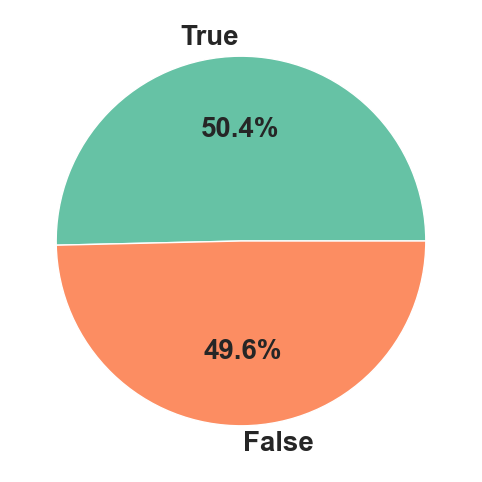

In [13]:
plt.figure(figsize=(10,6))
plt.pie(train_df['Transported'].value_counts() , labels=train_df["Transported"].value_counts().keys() , autopct="%1.1f%%",
        textprops={"fontsize":20 , "fontweight": "black"} , colors=sns.color_palette("Set2"))
plt.show()

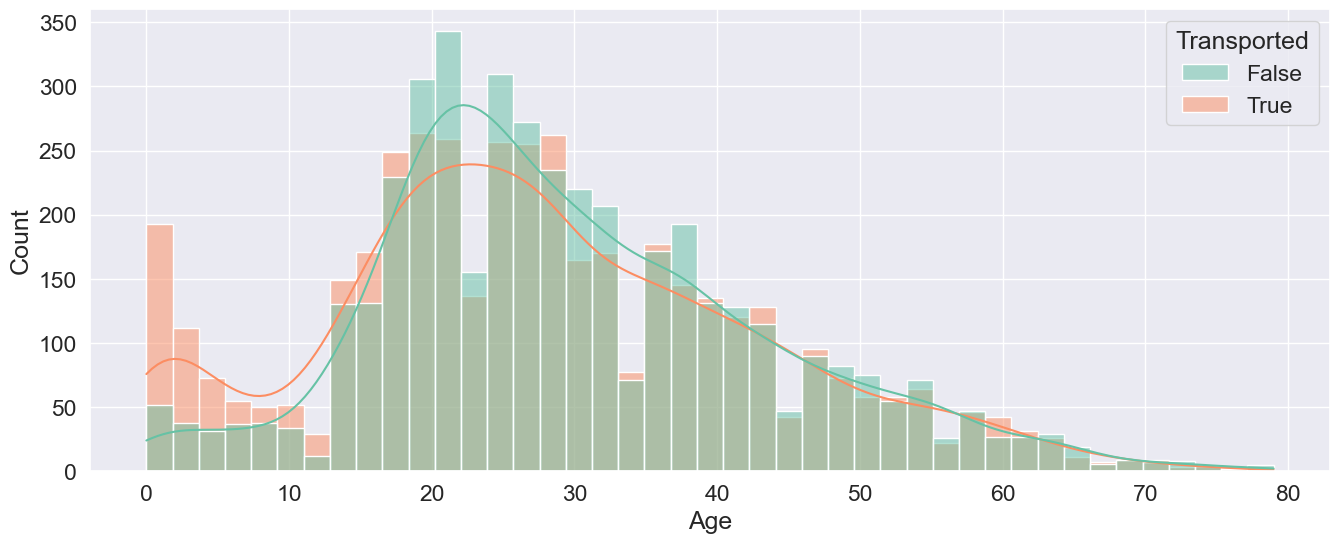

In [14]:
plt.figure(figsize=(16,6))
sns.histplot(data=train_df , x=train_df['Age'] , hue='Transported' , kde=True , palette="Set2" )
plt.show()

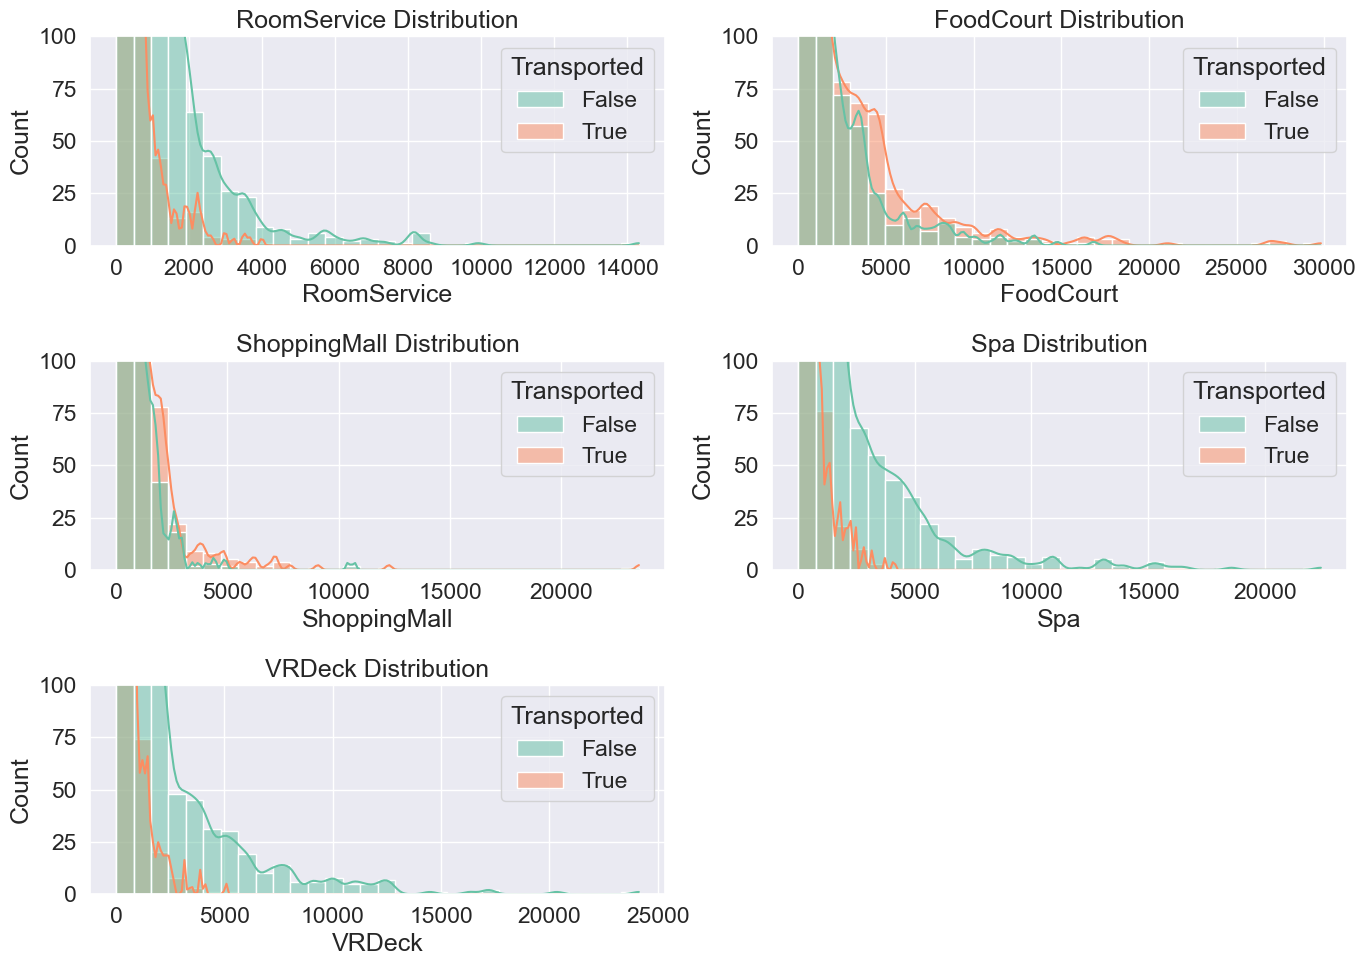

In [15]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

plt.figure(figsize=(14,10))
for idx,column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column, hue="Transported", data=train_df,bins=30,kde=True,palette="Set2")
    plt.title(f"{column} Distribution")
    plt.ylim(0,100)
    plt.tight_layout()

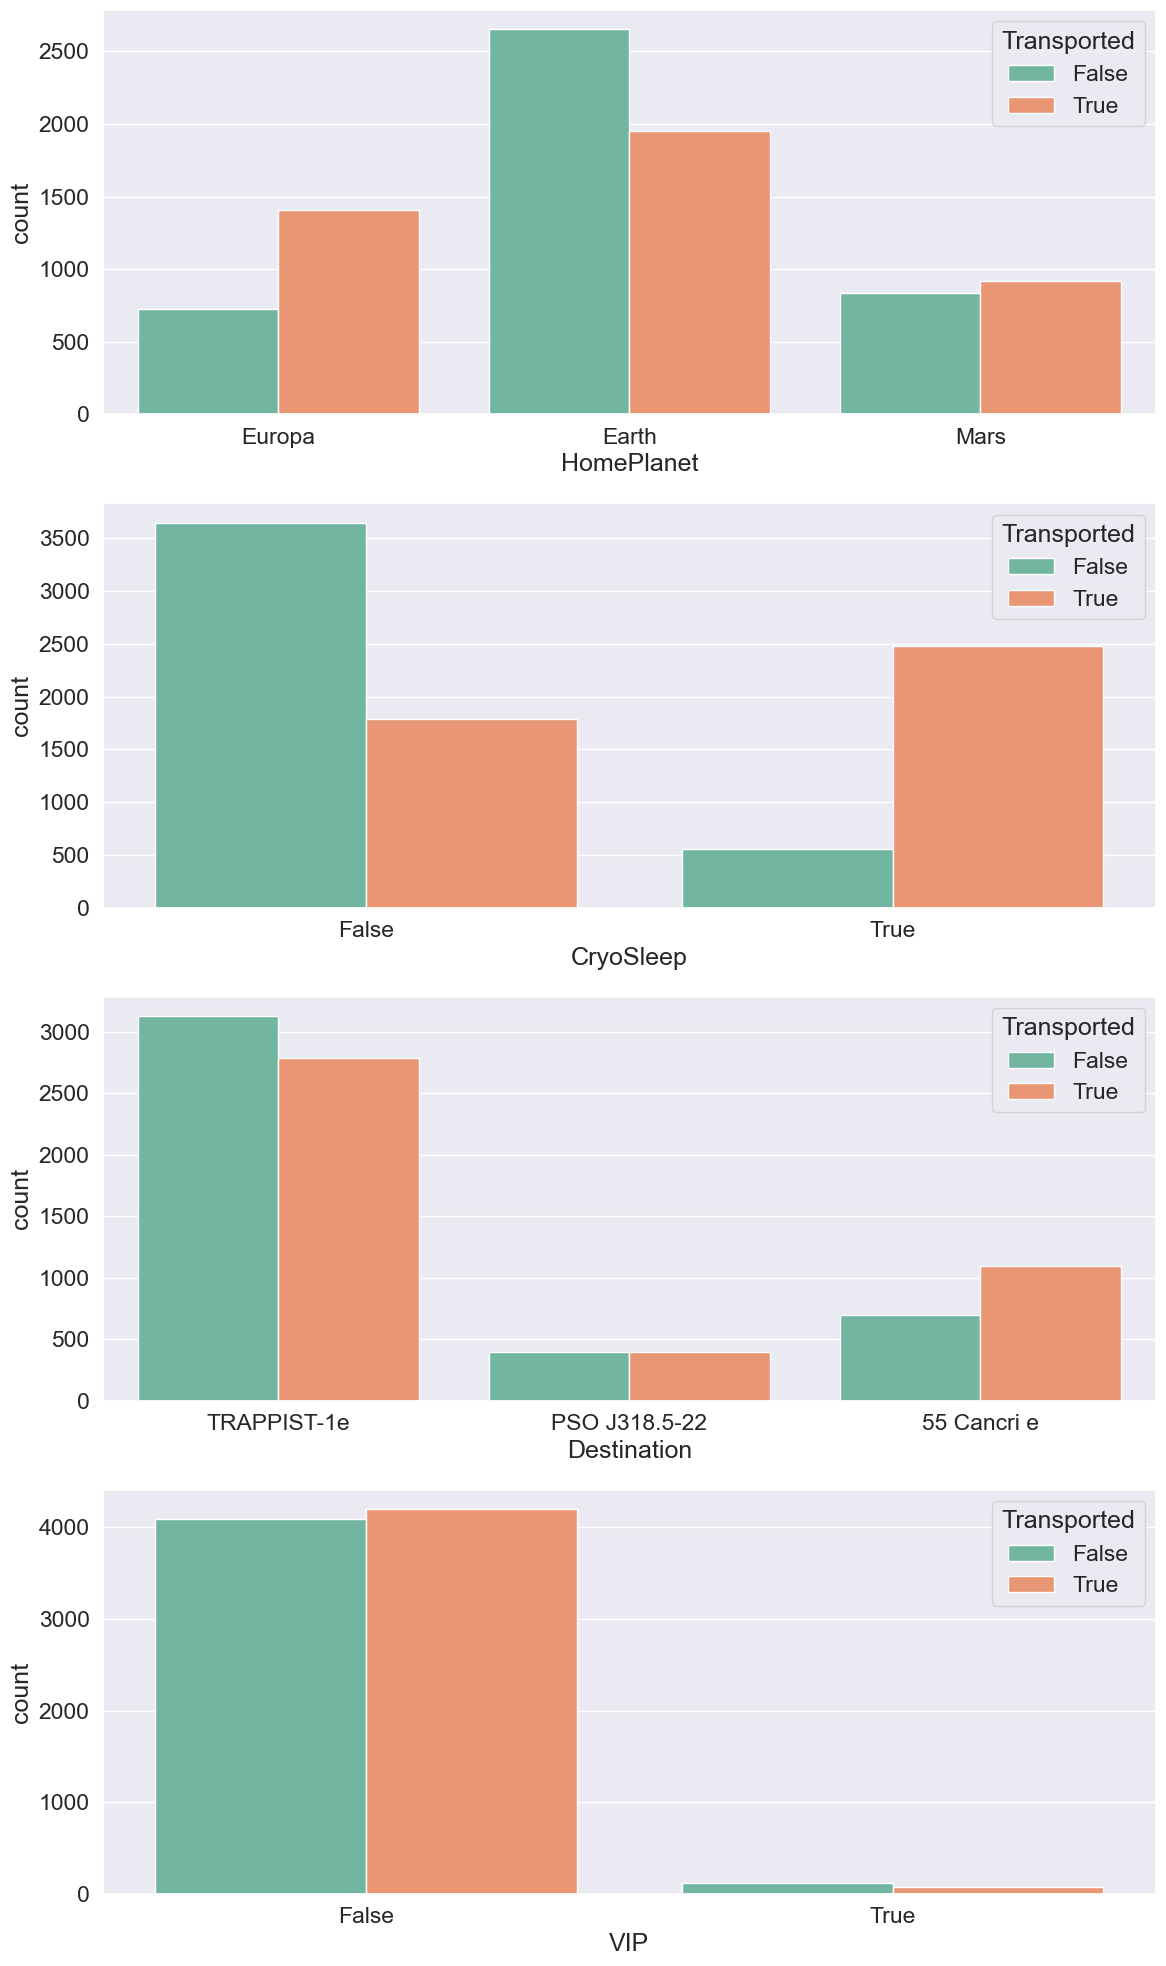

In [16]:
cat_cols = ["HomePlanet","CryoSleep","Destination","VIP"]

plt.figure(figsize=(12,20))
for idx , column in enumerate(cat_cols):
    plt.subplot(4,1 , idx+1)
    sns.countplot(data=train_df , x=column , hue='Transported' , palette='Set2')
    plt.tight_layout()

In [17]:
train_df["PassengerId"].head().to_frame()

,PassengerId
0,0001_01
1,0002_01
2,0003_01
3,0003_02
4,0004_01


In [18]:
def pessengerid(df):
    df['Group'] = df['PassengerId'].apply(lambda x: x.split("_")[0])
    df['Member'] = df['PassengerId'].apply(lambda x: x.split("_")[1])

    x = df.groupby("Group")["Member"].count().sort_values()
    #set(...): Bunları bir küme haline getiriyor (benzersiz değerler).
    y = set(x[x>1].index)

    df['Travelling_Solo'] = df['Group'].apply(lambda x: x not in y)
    df['Group_Size'] = 0
    for i in x.items():
        df.loc[df["Group"] ==i[0] , "Group_Size" ] = i[1]

In [19]:
pessengerid(train_df)
pessengerid(test_df)

In [20]:
train_df.drop(columns=["Group" ,"Member"] , inplace=True)
test_df.drop(columns=["Group" , "Member"], inplace=True)

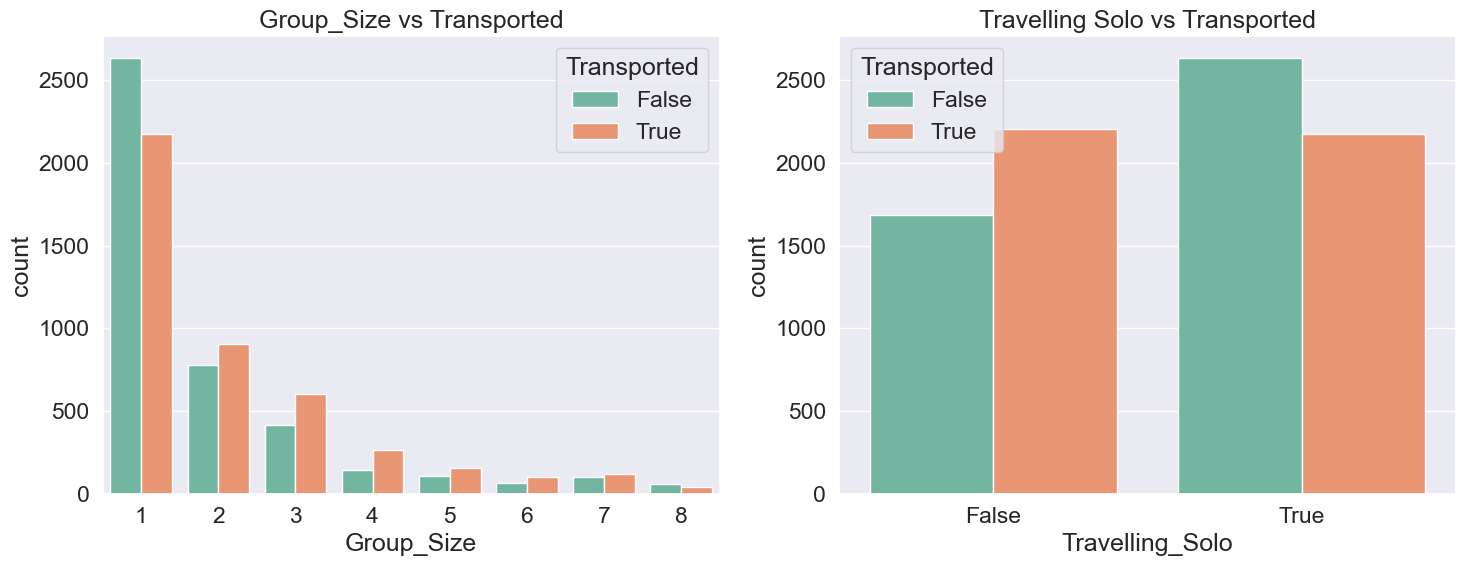

In [21]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(data=train_df , x='Group_Size' , hue='Transported' , palette="Set2")
plt.title("Group_Size vs Transported")

plt.subplot(1,2,2)
sns.countplot(data=train_df , x='Travelling_Solo' , hue='Transported' , palette="Set2")
plt.title("Travelling Solo vs Transported")
plt.tight_layout()
plt.show()

In [22]:
train_df['Cabin'].head().to_frame()

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S


In [23]:
def cabin_new_feature(df):
    # 'Cabin' yoksa boş string yap (split ile sorun yaşamamak için)
    df['Cabin'] = df['Cabin'].fillna('')

    # 'Cabin' -> Deck / Number / Side
    parts = df['Cabin'].str.split('/', expand=True)
    df['Cabin_Deck']   = parts[0]
    df['Cabin_Number'] = parts[1]
    df['Cabin_Side']   = parts[2]

    # Sayısal olmalı: non-numeric değerleri NaN yapıp sayıya çevir
    df['Cabin_Number'] = pd.to_numeric(df['Cabin_Number'], errors='coerce')

    # Boş/eksik kategorik alanları mod ile doldur
    if df['Cabin_Deck'].isna().any() or (df['Cabin_Deck'] == '').any():
        df.loc[df['Cabin_Deck'] == '', 'Cabin_Deck'] = np.nan
        df['Cabin_Deck'].fillna(df['Cabin_Deck'].mode()[0], inplace=True)

    if df['Cabin_Side'].isna().any() or (df['Cabin_Side'] == '').any():
        df.loc[df['Cabin_Side'] == '', 'Cabin_Side'] = np.nan
        df['Cabin_Side'].fillna(df['Cabin_Side'].mode()[0], inplace=True)

    # Sayısal alanı median ile doldur
    df['Cabin_Number'].fillna(df['Cabin_Number'].median(), inplace=True)

    # İstersen orijinal 'Cabin' sütununu bırakma
    # df.drop(columns='Cabin', inplace=True)


In [24]:
cabin_new_feature(train_df)
cabin_new_feature(test_df)

In [25]:
train_df["Cabin_Number"]=train_df["Cabin_Number"].astype(int)
test_df["Cabin_Number"]=test_df["Cabin_Number"].astype(int)

In [26]:
print("Total Unique values present in Cabin_Number feature is:",train_df["Cabin_Number"].nunique())
print("The Mean of Cabin_Number Feature is: ",train_df["Cabin_Number"].mean())
print("The Median of Cabin_Number Feature is:",train_df["Cabin_Number"].median())
print("The Minimum value of Cabin_Number feature is:",train_df["Cabin_Number"].min())
print("The Maximum value of Cabin_number Feature is:",train_df["Cabin_Number"].max())

Total Unique values present in Cabin_Number feature is: 1817
The Mean of Cabin_Number Feature is:  596.3989416772115
The Median of Cabin_Number Feature is: 427.0
The Minimum value of Cabin_Number feature is: 0
The Maximum value of Cabin_number Feature is: 1894


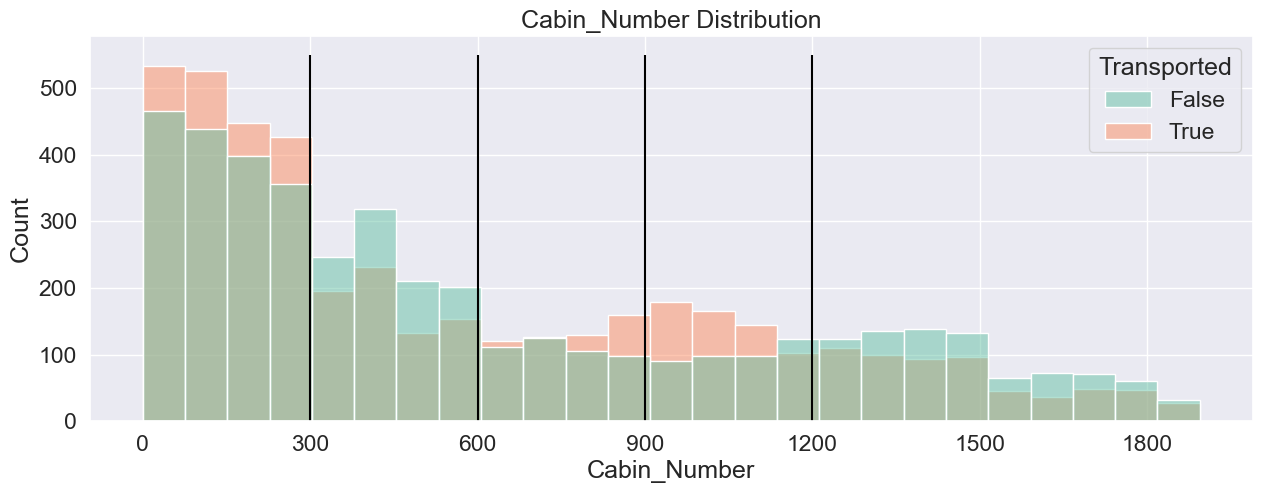

In [27]:
plt.figure(figsize=(15,5))
sns.histplot(data=train_df , x='Cabin_Number' , hue='Transported' , palette='Set2')
plt.title("Cabin_Number Distribution")
plt.xticks(list(range(0,1900,300)))
plt.vlines(300 , ymin=0 , ymax=550 , colors="black")
plt.vlines(600 , ymin=0 , ymax=550 , colors="black")
plt.vlines(900 , ymin=0 , ymax=550 , colors="black")
plt.vlines(1200 , ymin=0 , ymax=550 , colors= "black")
plt.show()

In [28]:
def cabin_regions(df):
    df["Cabin_Region1"] = (df["Cabin_Number"]<300)
    df["Cabin_Region2"] = (df["Cabin_Number"]>=300) & (df["Cabin_Number"]<600)
    df["Cabin_Region3"] = (df["Cabin_Number"]>=600) & (df["Cabin_Number"]<900)
    df["Cabin_Region4"] = (df["Cabin_Number"]>=900) & (df["Cabin_Number"]<1200)
    df["Cabin_Region5"] = (df["Cabin_Number"]>=1200) & (df["Cabin_Number"]<1500)
    df["Cabin_Region6"] = (df["Cabin_Number"]>=1500)

In [29]:
cabin_regions(train_df)
cabin_regions(test_df)

In [30]:
train_df.drop(columns=["Cabin_Number"] , inplace=True)
test_df.drop(columns=["Cabin_Number"] , inplace=True)

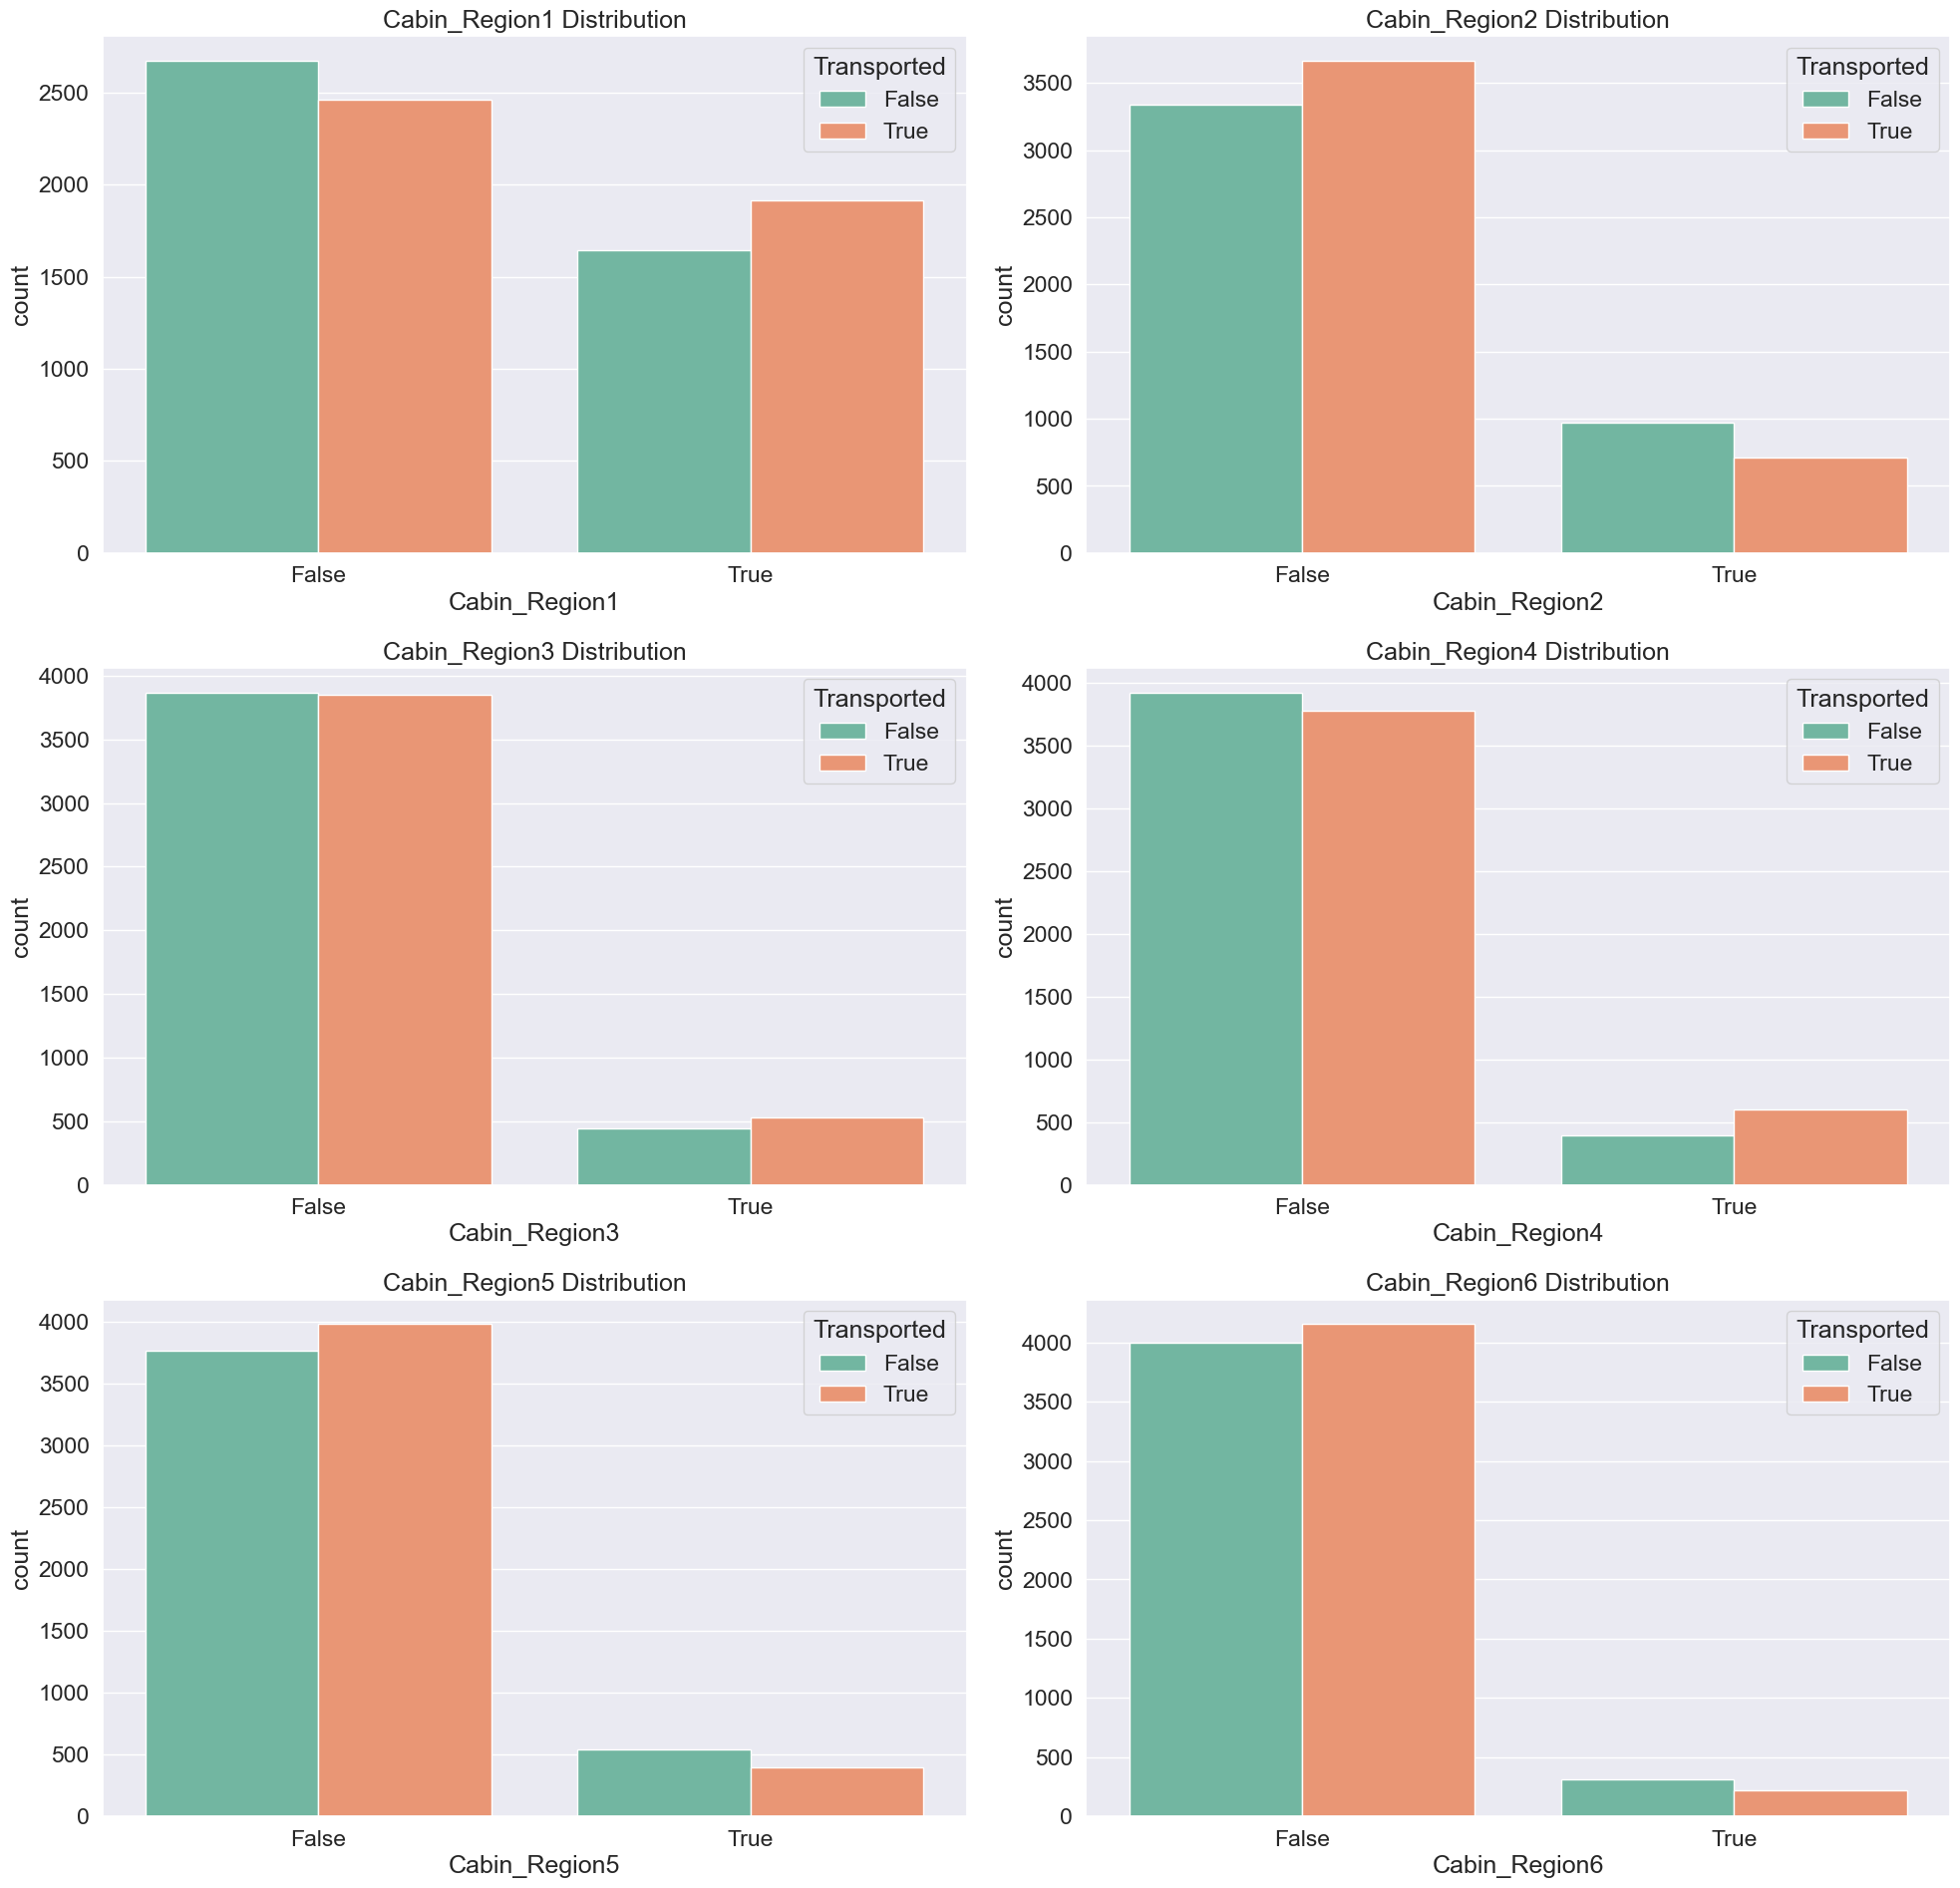

In [31]:
cols = ["Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6"]

plt.figure(figsize=(20,25))
for idx,value in enumerate(cols):
    plt.subplot(4,2,idx+1)
    sns.countplot(x=value, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"{value} Distribution")
    plt.tight_layout()

In [32]:
train_df["Age"].head().to_frame()

,Age
0,39.0
1,24.0
2,58.0
3,33.0
4,16.0


In [33]:
def age_group(df):
    age_group = []
    for i in df["Age"]:
        if i <=12:
            age_group.append("Age_0-12")
        elif (i>12 and i<=18):
            age_group.append("Age_0-18")
        elif (i>18 and i<=25):
            age_group.append("Age_19-25")
        elif (i>25 and i<=32):
            age_group.append("Age_26-32")
        elif (i>32 and i<=50):
            age_group.append("Age_33-50")
        elif (i>50):
            age_group.append("Age_50+")
        else:
            age_group.append(np.nan)
    df["Age Group"] = age_group

In [34]:
age_group(train_df)
age_group(test_df)

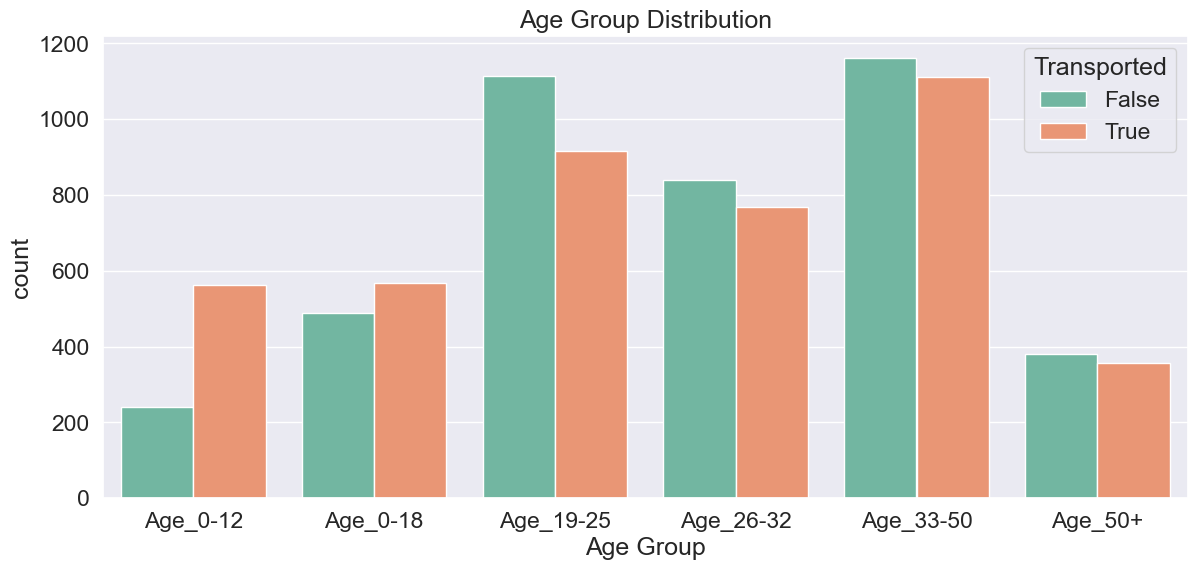

In [37]:
order = sorted(train_df["Age Group"].value_counts().keys().to_list())

plt.figure(figsize=(14,6))
sns.countplot(data=train_df , x='Age Group' , hue='Transported' , palette="Set2" , order=order)
plt.title("Age Group Distribution")
plt.show()

In [38]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,P,True,False,False,False,False,False,Age_33-50
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,S,True,False,False,False,False,False,Age_19-25
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,S,True,False,False,False,False,False,Age_50+
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2,A,S,True,False,False,False,False,False,Age_33-50
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1,F,S,True,False,False,False,False,False,Age_0-18


In [39]:
train_df[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


In [40]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

def new_exp_features(df):
    df["Total Expenditure"] = df[exp_cols].sum(axis=1)
    df["No Spending"] = (df["Total Expenditure"] == 0 )

In [41]:
new_exp_features(train_df)
new_exp_features(test_df)

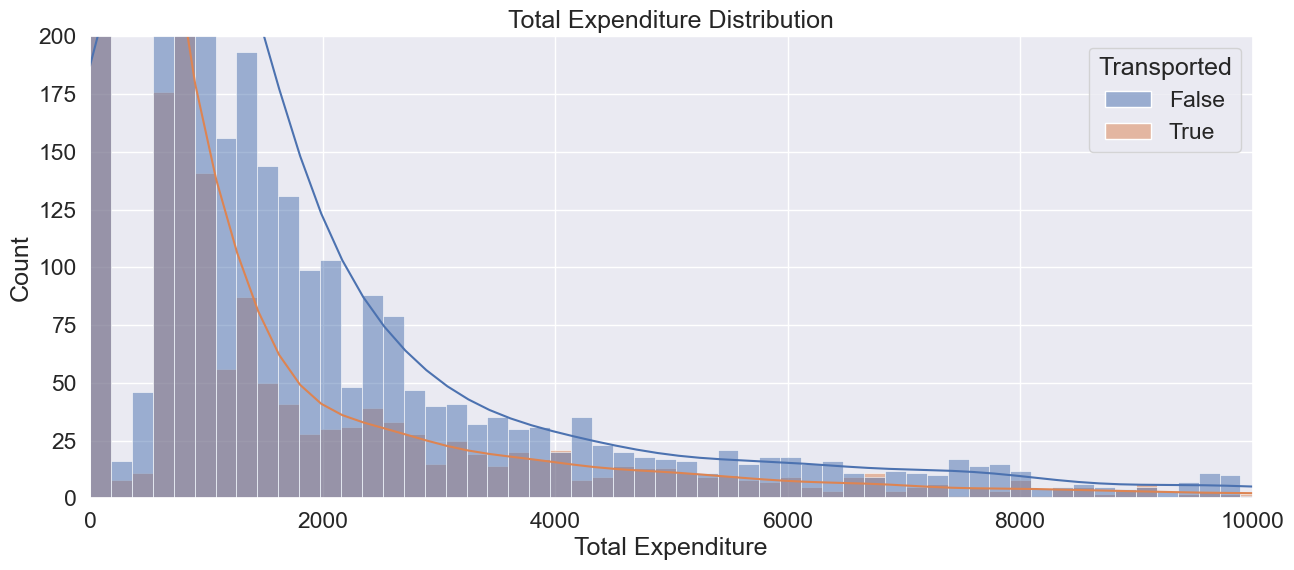

In [45]:
plt.figure(figsize=(15,6))
sns.histplot(data=train_df , x='Total Expenditure' , hue='Transported' , kde=True , bins=200)
plt.ylim(0 , 200)
plt.xlim(0 , 10000)
plt.title("Total Expenditure Distribution")
plt.show()

In [46]:
mean = round(train_df["Total Expenditure"].mean())
median = train_df["Total Expenditure"].median()

print("Mean value of Total Expenditure feature is = "  , mean)
print("Median value of Total Expenditure is = " , median)

Mean value of Total Expenditure feature is =  1441
Median value of Total Expenditure is =  716.0


In [50]:
def expenditure_category(df):
    expense_category = []
    
    for i in df["Total Expenditure"]:
        if i==0:
            expense_category.append("No Expense")
        elif (i>0 and i<=716):
            expense_category.append("Low Expense")
        elif (i>716 and i<=1441):
            expense_category.append("Medium Expense")
        elif (i>1441):
            expense_category.append("High Expense")
    
    df["Expenditure Category"] = expense_category


In [51]:
expenditure_category(train_df)
expenditure_category(test_df)

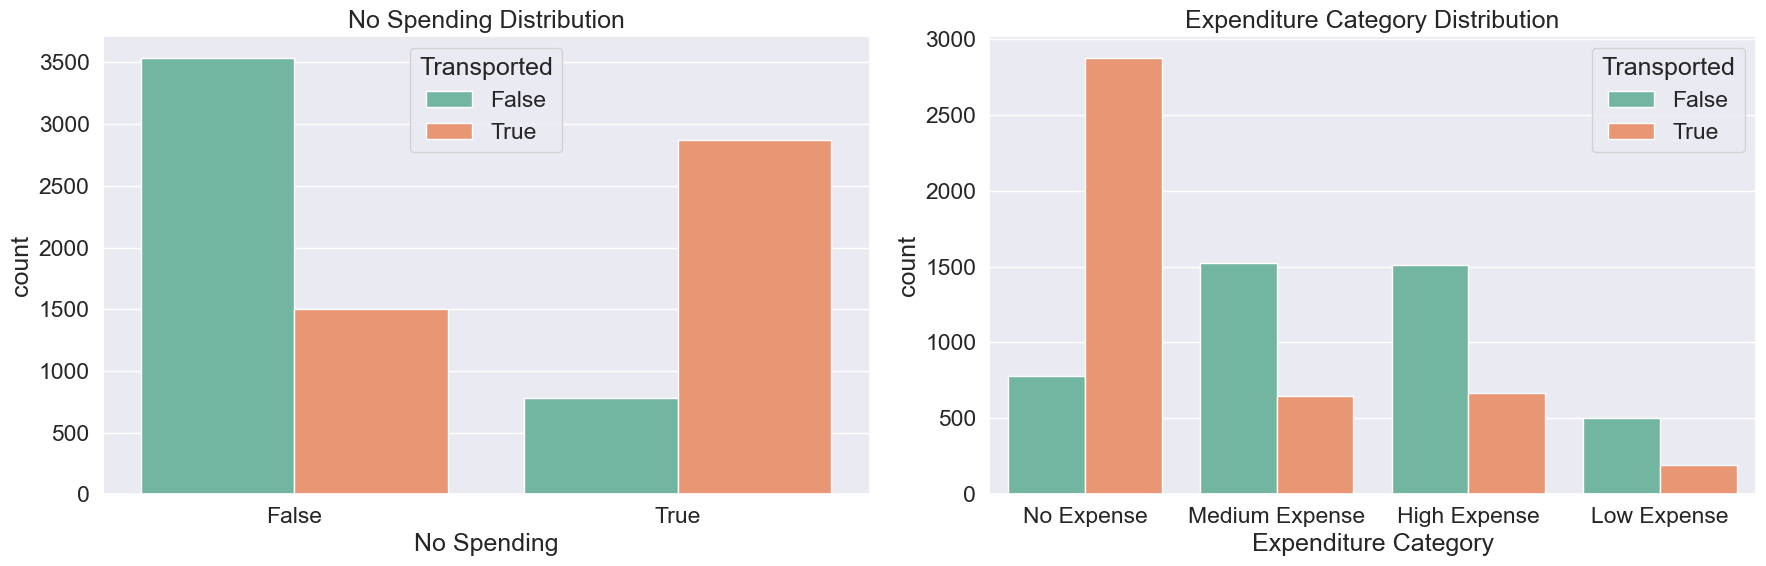

In [52]:
cols = ["No Spending", "Expenditure Category"]

plt.figure(figsize=(18,6))
for idx,column in enumerate(cols):
    plt.subplot(1,2,idx+1)
    sns.countplot(x=column, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"{column} Distribution")
    plt.tight_layout()


In [ ]:
z = train_df.isnull().sum()[train_df.isnull().sum()>0].to_frame().rename(columns={0:"No. of Missing values"})
z["% of Missing values"] = round(train_df.isnull().sum()[train_df.isnull().sum()>0]*100/len(train_df),2)
z


,No. of Missing values,% of Missing values
HomePlanet,201,2.31
CryoSleep,217,2.50
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11
VRDeck,188,2.16


In [65]:
#missingno eksik değerleri görselleştirmek için kullanılan bir Python kütüphanesidir
import missingno as msno

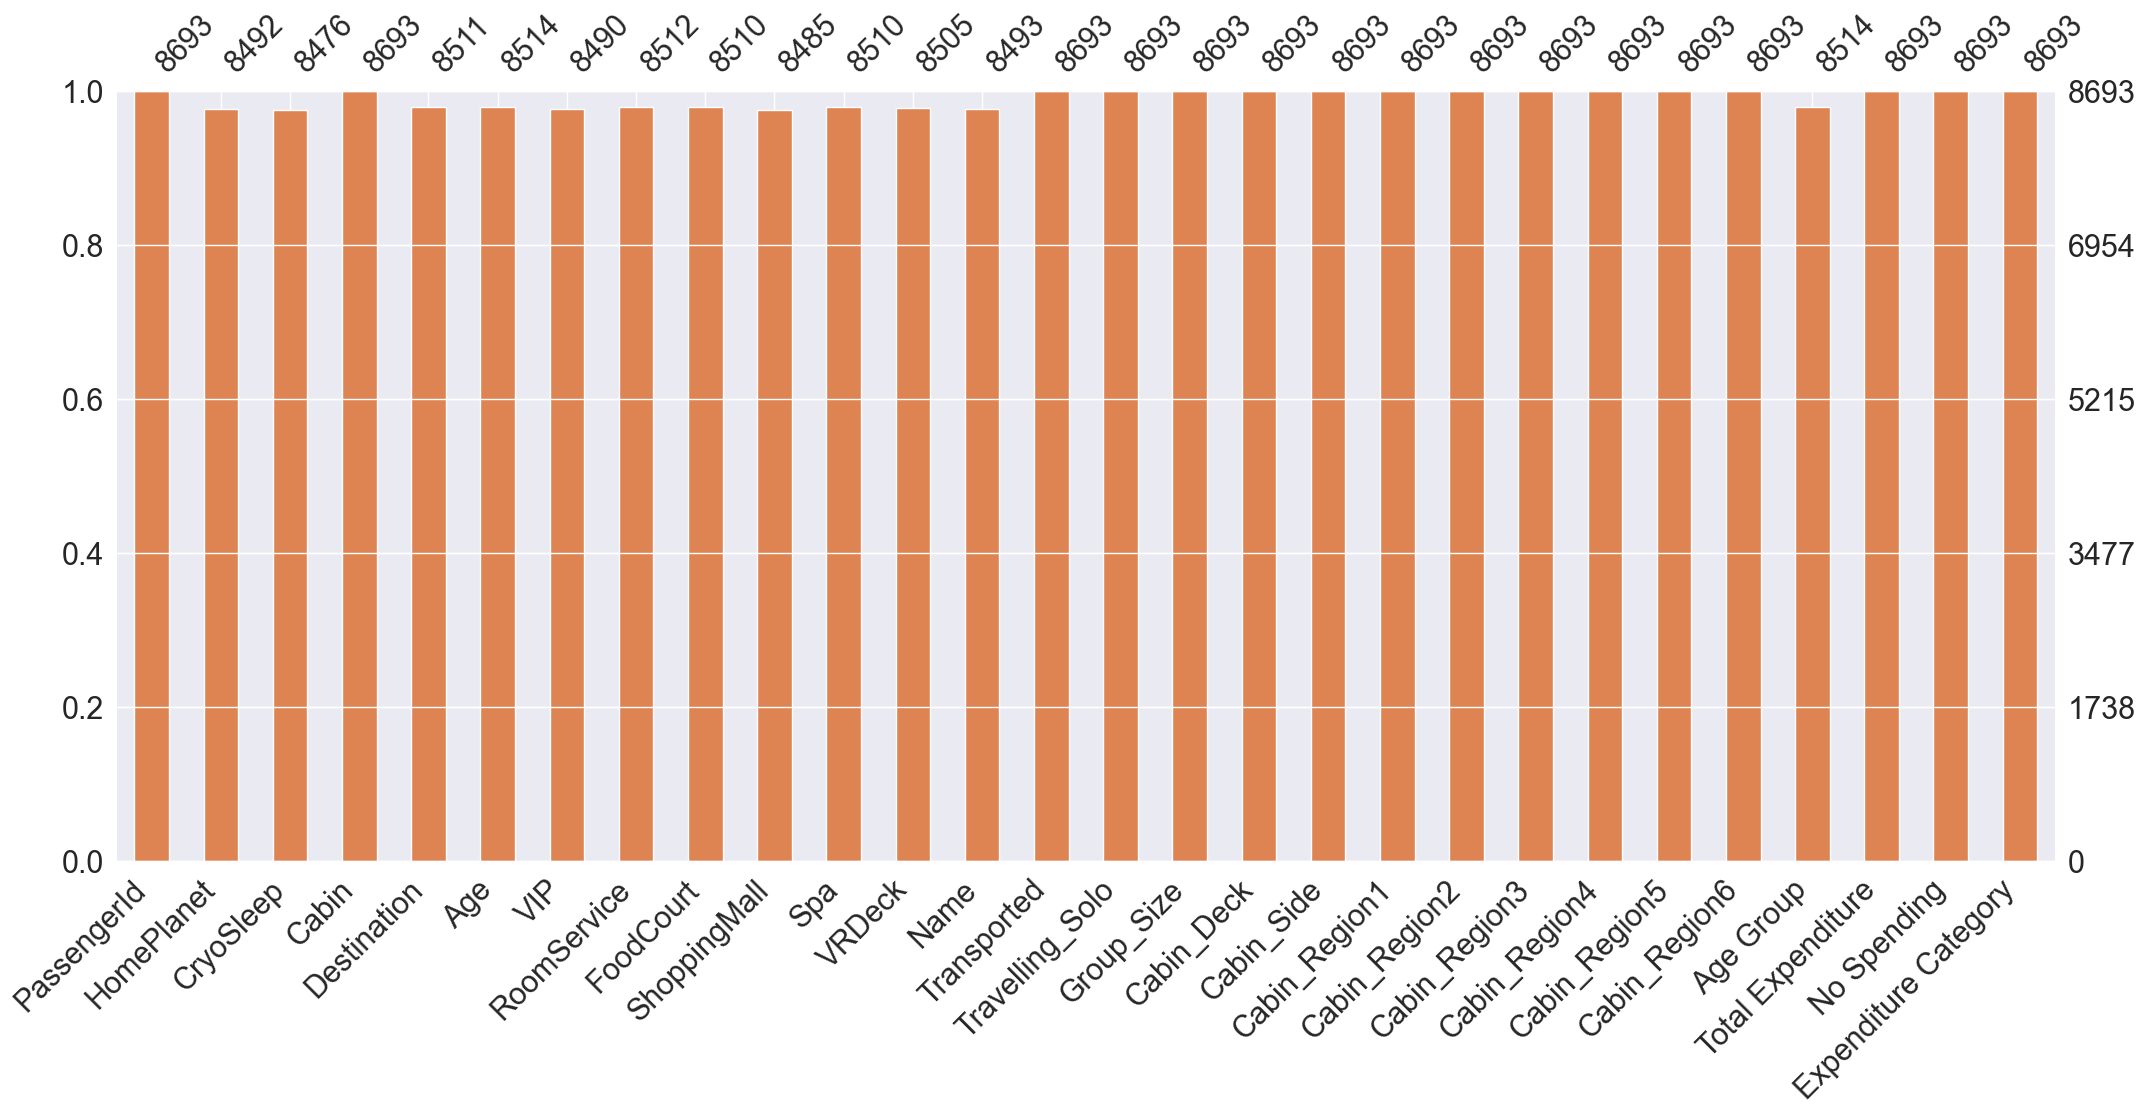

In [64]:
msno.bar(train_df , color="C1" , fontsize=22)
plt.show()

In [68]:
#pandas DataFrame içinde, sütunları veri tiplerine göre seçmek için kullanılır.
# to_list() index değerlerini listeye çevirir
cat_cols = train_df.select_dtypes(include=["object" , "bool"]).columns.to_list()
cat_cols.remove("Transported")
num_cols = train_df.select_dtypes(include=["int" , "float"]).columns.to_list()
num_cols

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Group_Size',
 'Total Expenditure']

In [70]:
print("Categorical Columns:" ,cat_cols)
print("\n" , "-"*120)
print("\nNumerical Columns:" , num_cols)

Categorical Columns: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Travelling_Solo', 'Cabin_Deck', 'Cabin_Side', 'Cabin_Region1', 'Cabin_Region2', 'Cabin_Region3', 'Cabin_Region4', 'Cabin_Region5', 'Cabin_Region6', 'Age Group', 'No Spending', 'Expenditure Category']

 ------------------------------------------------------------------------------------------------------------------------

Numerical Columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group_Size', 'Total Expenditure']


In [71]:
imputer1 = SimpleImputer(strategy="most_frequent")
imputer2 = SimpleImputer(strategy="median")


In [72]:
def fill_missingno(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [73]:
fill_missingno(train_df)
fill_missingno(test_df)

In [76]:
print("Missing numbers left in train_df is:",train_df.isnull().sum().sum())
print("Missing numbers left in test_df is:",test_df.isnull().sum().sum())


Missing numbers left in train_df is: 0
Missing numbers left in test_df is: 0


In [77]:
print("Duplicate values in training data is: ",train_df.duplicated().sum())
print("Duplicate values in testing data is: ",test_df.duplicated().sum())

Duplicate values in training data is:  0
Duplicate values in testing data is:  0


In [79]:
print("Cardinality of features in numerical data is: ")
print(train_df.select_dtypes(include=["object"]).nunique())
print("\n","-"*50)
print("\nCardinality of features in categorical data is: ")
print(test_df.select_dtypes(include=["object"]).nunique())

Cardinality of features in numerical data is: 
PassengerId             8693
HomePlanet                 3
CryoSleep                  2
Cabin                   6561
Destination                3
VIP                        2
Name                    8473
Travelling_Solo            2
Cabin_Deck                 8
Cabin_Side                 2
Cabin_Region1              2
Cabin_Region2              2
Cabin_Region3              2
Cabin_Region4              2
Cabin_Region5              2
Cabin_Region6              2
Age Group                  6
No Spending                2
Expenditure Category       4
dtype: int64

 --------------------------------------------------

Cardinality of features in categorical data is: 
PassengerId             4277
HomePlanet                 3
CryoSleep                  2
Cabin                   3266
Destination                3
VIP                        2
Name                    4176
Travelling_Solo            2
Cabin_Deck                 8
Cabin_Side               

In [80]:
pass_df = test_df[["PassengerId"]]

In [81]:
cols = ["PassengerId" , "Cabin" , "Name"]
train_df.drop(columns=cols , inplace=True)
test_df.drop(columns=cols , inplace=True)

In [84]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_Size,Total Expenditure
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.790291,220.009318,448.434027,169.572300,304.588865,298.261820,2.035546,1440.866329
std,14.341404,660.519050,1595.790627,598.007164,1125.562559,1134.126417,1.596347,2803.045694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,716.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000,3.000000,1441.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,8.000000,35987.000000


In [85]:
cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total Expenditure']

for value in cols :
    train_df[value] = np.log(1+train_df[value])
    test_df[value] = np.log(1+test_df[value])

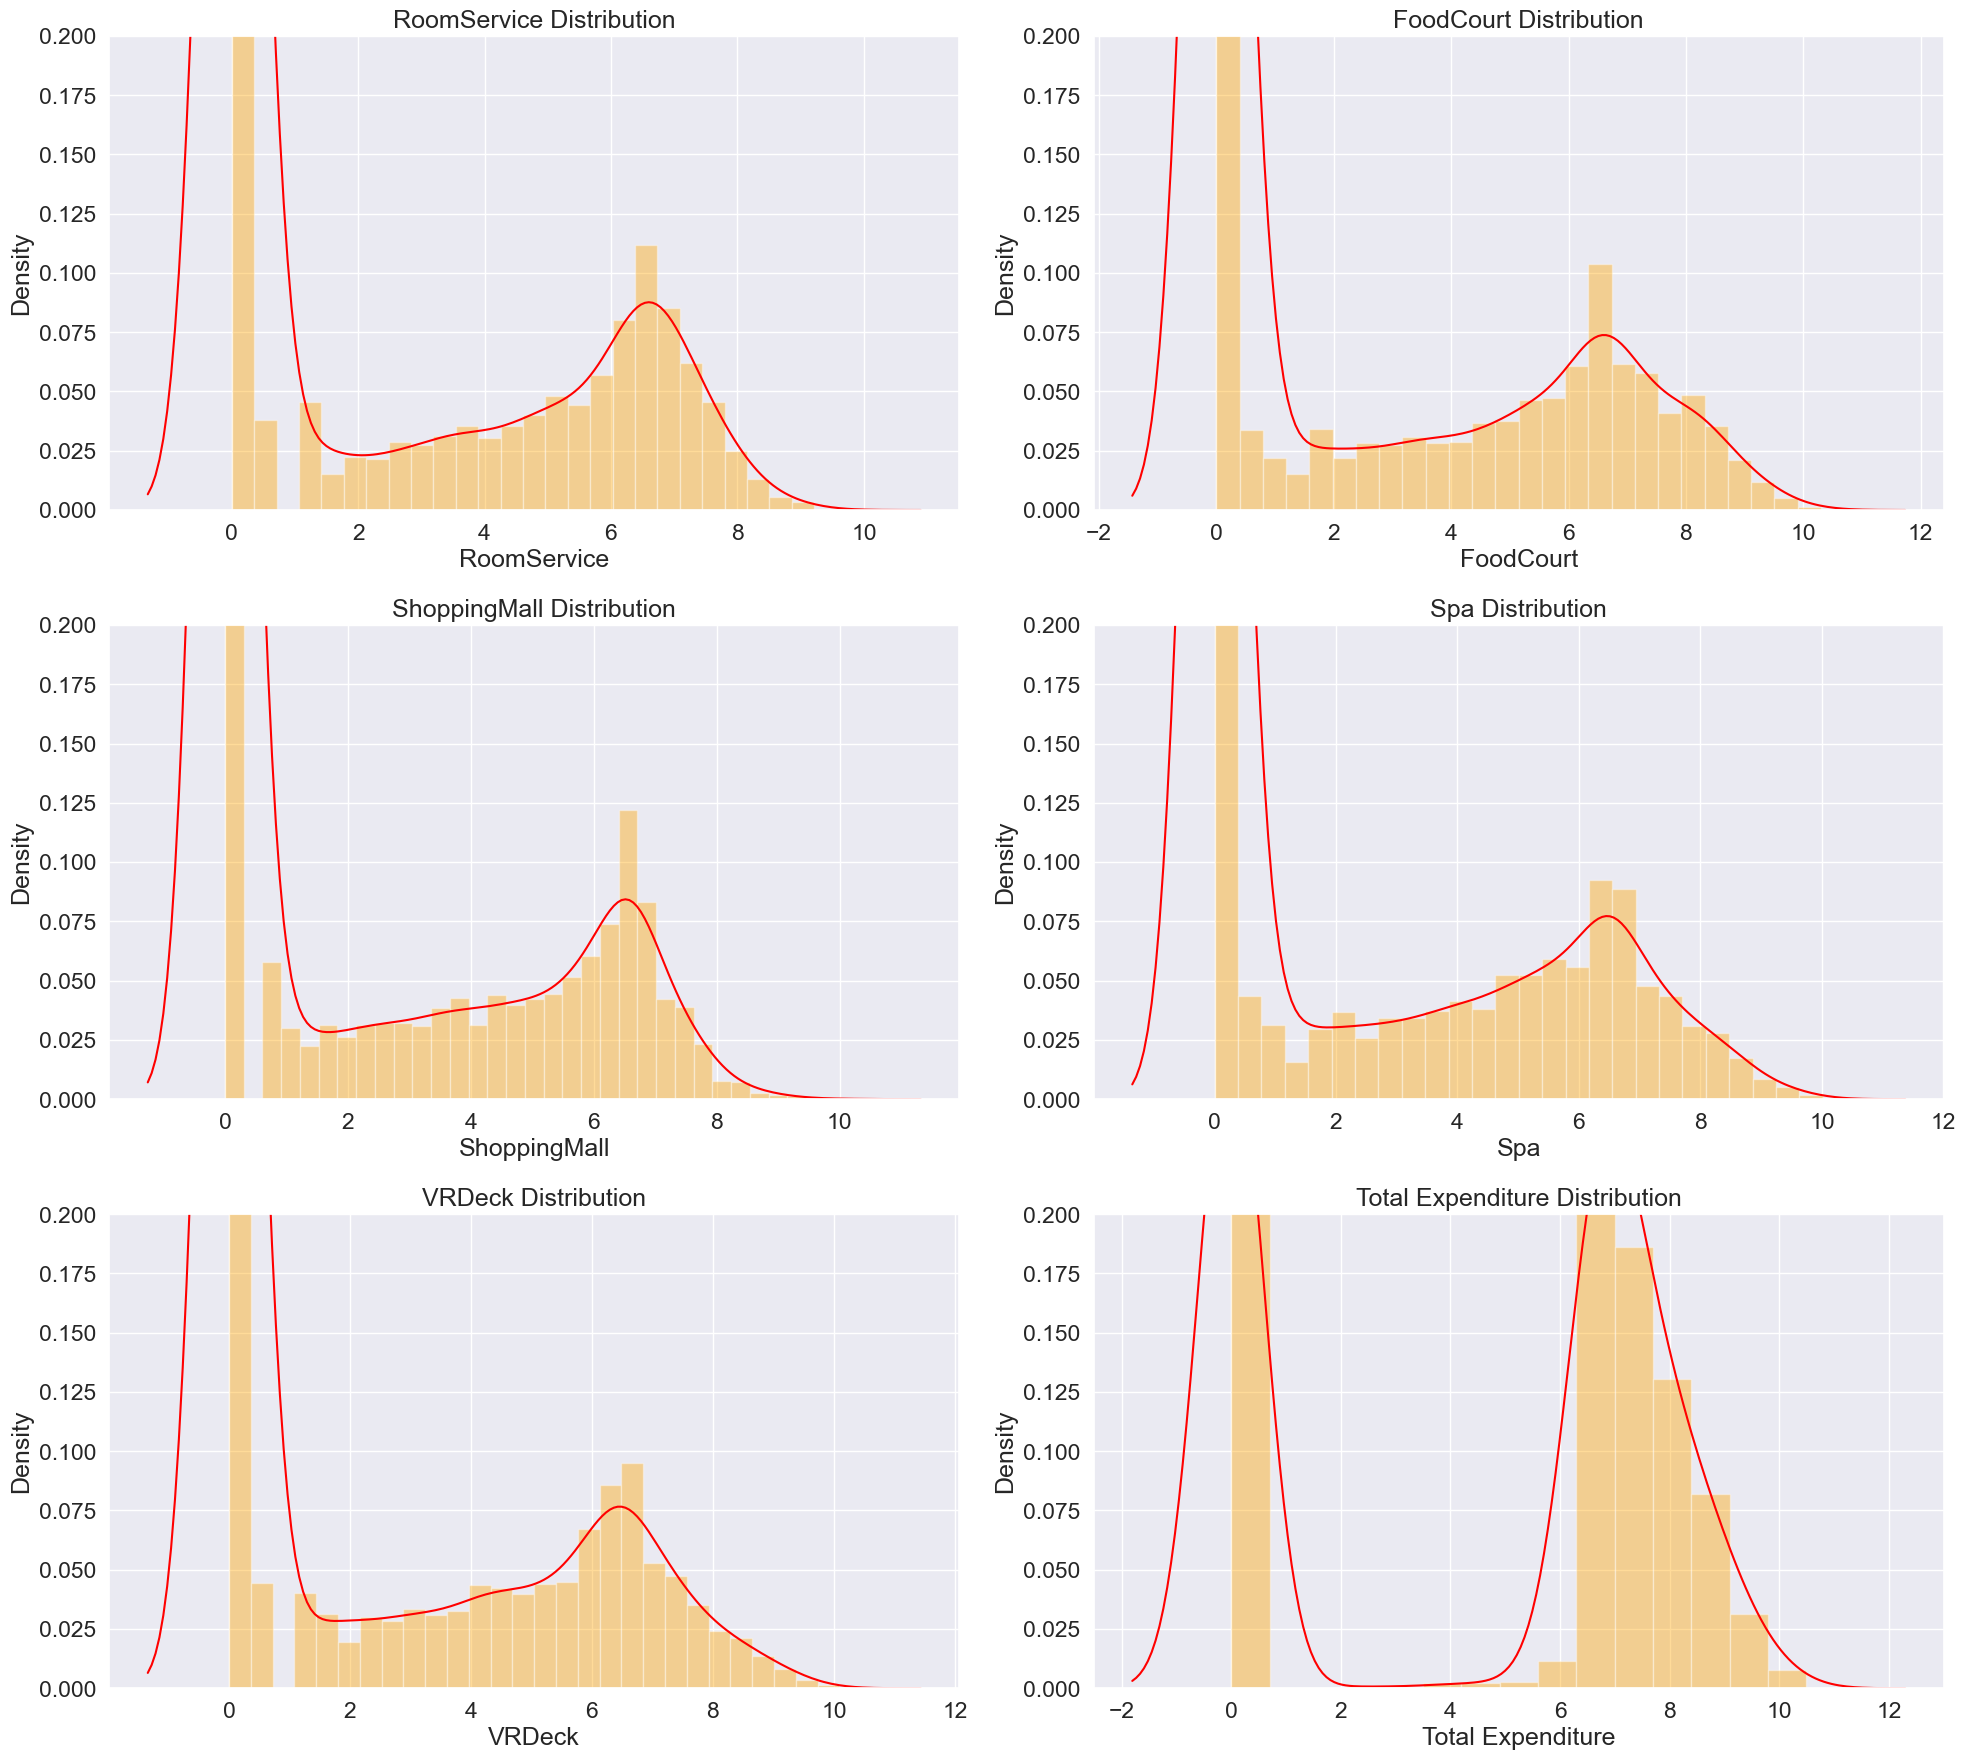

In [89]:
x = 1

plt.figure(figsize=(20,35))
for i in cols:
    plt.subplot(6,2,x)
    sns.distplot(train_df[i] , color='orange' , kde_kws={"color":"red"})
    plt.ylim(0,0.2)
    plt.title(f"{i} Distribution")
    plt.tight_layout()
    x+=1

In [90]:
train_df.dtypes

HomePlanet               object
CryoSleep                object
Destination              object
Age                     float64
VIP                      object
RoomService             float64
FoodCourt               float64
ShoppingMall            float64
Spa                     float64
VRDeck                  float64
Transported                bool
Travelling_Solo          object
Group_Size              float64
Cabin_Deck               object
Cabin_Side               object
Cabin_Region1            object
Cabin_Region2            object
Cabin_Region3            object
Cabin_Region4            object
Cabin_Region5            object
Cabin_Region6            object
Age Group                object
Total Expenditure       float64
No Spending              object
Expenditure Category     object
dtype: object

In [91]:
cols = ["CryoSleep","VIP","Travelling_Solo","No Spending","Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4",
       "Cabin_Region5","Cabin_Region6"]
train_df[cols] = train_df[cols].astype(bool)
test_df[cols] = test_df[cols].astype(bool)

In [92]:
nominal_cat_cols = ["HomePlanet","Destination"]
ordinal_cat_cols = ["CryoSleep","VIP","Travelling_Solo","Cabin_Deck","Cabin_Side","Cabin_Region1","Cabin_Region2",
                    "Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6","Age Group","No Spending",
                    "Expenditure Category"]

In [94]:
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category
0,Earth,True,TRAPPIST-1e,27.0,False,0.000000,0.000000,0.000000,0.000000,0.00000,True,1.0,G,S,True,False,False,False,False,False,Age_26-32,0.000000,True,No Expense
1,Earth,False,TRAPPIST-1e,19.0,False,0.000000,2.302585,0.000000,7.945910,0.00000,True,1.0,F,S,True,False,False,False,False,False,Age_19-25,7.949091,False,High Expense
2,Europa,True,55 Cancri e,31.0,False,0.000000,0.000000,0.000000,0.000000,0.00000,True,1.0,C,S,True,False,False,False,False,False,Age_26-32,0.000000,True,No Expense
3,Europa,False,TRAPPIST-1e,38.0,False,0.000000,8.802823,0.000000,5.204007,6.37332,True,1.0,C,S,True,False,False,False,False,False,Age_33-50,8.911800,False,High Expense
4,Earth,False,TRAPPIST-1e,20.0,False,2.397895,0.000000,6.455199,0.000000,0.00000,True,1.0,F,S,True,False,False,False,False,False,Age_19-25,6.470800,False,Low Expense


In [96]:
enc = LabelEncoder()

In [97]:
train_df[ordinal_cat_cols] = train_df[ordinal_cat_cols].apply(enc.fit_transform)
test_df[ordinal_cat_cols] = test_df[ordinal_cat_cols].apply(enc.fit_transform)

In [98]:
train_df = pd.get_dummies(train_df , columns=nominal_cat_cols)
test_df = pd.get_dummies(test_df , columns=nominal_cat_cols)

In [99]:
train_df["Transported"].replace({False:0 , True:1} , inplace=True)

In [100]:
train_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,1.0,1,0,1,0,0,0,0,0,4,0.000000,1,3,False,True,False,False,False,True
1,0,24.0,0,4.700480,2.302585,3.258097,6.309918,3.806662,1,1,1.0,5,1,1,0,0,0,0,0,2,6.602588,0,2,True,False,False,False,False,True
2,0,58.0,1,3.784190,8.182280,0.000000,8.812248,3.912023,0,0,2.0,0,1,1,0,0,0,0,0,5,9.248021,0,0,False,True,False,False,False,True
3,0,33.0,0,0.000000,7.157735,5.918894,8.110728,5.267858,0,0,2.0,0,1,1,0,0,0,0,0,4,8.551981,0,0,False,True,False,False,False,True
4,0,16.0,0,5.717028,4.262680,5.023881,6.338594,1.098612,1,1,1.0,5,1,1,0,0,0,0,0,1,6.995766,0,2,True,False,False,False,False,True


In [101]:
test_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.0,0,0.000000,0.000000,0.000000,0.000000,0.00000,1,1.0,6,1,1,0,0,0,0,0,3,0.000000,1,3,True,False,False,False,False,True
1,0,19.0,0,0.000000,2.302585,0.000000,7.945910,0.00000,1,1.0,5,1,1,0,0,0,0,0,2,7.949091,0,0,True,False,False,False,False,True
2,1,31.0,0,0.000000,0.000000,0.000000,0.000000,0.00000,1,1.0,2,1,1,0,0,0,0,0,3,0.000000,1,3,False,True,False,True,False,False
3,0,38.0,0,0.000000,8.802823,0.000000,5.204007,6.37332,1,1.0,2,1,1,0,0,0,0,0,4,8.911800,0,0,False,True,False,False,False,True
4,0,20.0,0,2.397895,0.000000,6.455199,0.000000,0.00000,1,1.0,5,1,1,0,0,0,0,0,2,6.470800,0,1,True,False,False,False,False,True


In [102]:
X = train_df.drop(columns=["Transported"])
y = train_df[["Transported"]]

In [103]:
scaler = StandardScaler()

In [104]:
X_scaled = scaler.fit_transform(X)
test_df_scaled = scaler.fit_transform(test_df)

In [105]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.2 ,random_state=0)
print(x_train.shape , y_train.shape)

(6954, 28) (6954, 1)


In [106]:
print(x_test.shape , y_test.shape)

(1739, 28) (1739, 1)


In [107]:
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(X_scaled , y , test_size=0.2 , random_state=0)
print(x_train1.shape , y_train1.shape)

(6954, 28) (6954, 1)


In [108]:
print(x_test1.shape , y_test1.shape)

(1739, 28) (1739, 1)


In [115]:
training_score = []
testing_score = []

def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test1,x_test_pred1))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,x_test_pred1))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,x_test_pred1))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score of LogisticRegression() model on Training Data is: 77.85447224618925
Accuracy_Score of LogisticRegression() model on Testing Data is: 77.11328349626221

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.7569892473118279
Recall Score of LogisticRegression() model is: 0.8036529680365296
F1 Score of LogisticRegression() model is: 0.7796234772978959

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


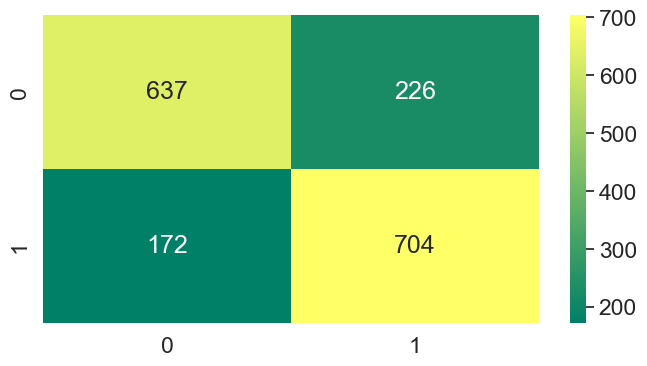

In [116]:
model_prediction(LogisticRegression())

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 83.01696865113604
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 75.56066705002875

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.7713598074608905
Recall Score of KNeighborsClassifier() model is: 0.7317351598173516
F1 Score of KNeighborsClassifier() model is: 0.7510251903925015

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


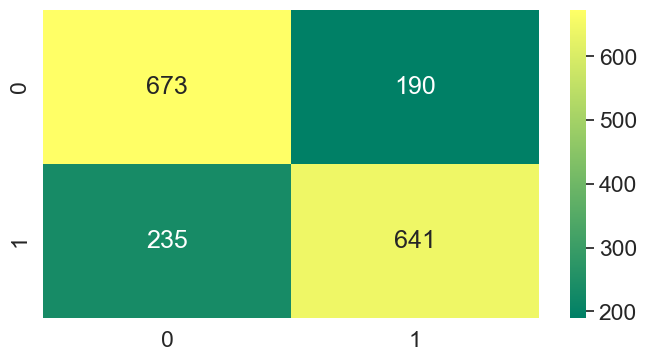

In [117]:
model_prediction(KNeighborsClassifier())

Accuracy_Score of SVC() model on Training Data is: 81.8234109864826
Accuracy_Score of SVC() model on Testing Data is: 79.700977573318

------------------------------------------------------------------------
Precision Score of SVC() model is: 0.7995418098510882
Recall Score of SVC() model is: 0.7968036529680366
F1 Score of SVC() model is: 0.7981703830760435

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


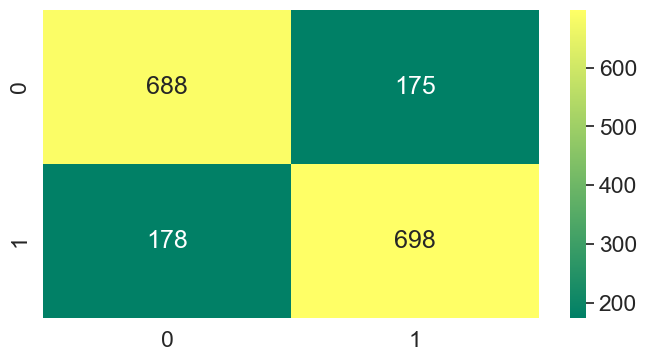

In [118]:
model_prediction(SVC())

Accuracy_Score of GaussianNB() model on Training Data is: 73.94305435720449
Accuracy_Score of GaussianNB() model on Testing Data is: 73.3755031627372

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.7779273216689099
Recall Score of GaussianNB() model is: 0.6598173515981736
F1 Score of GaussianNB() model is: 0.7140210006176653

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


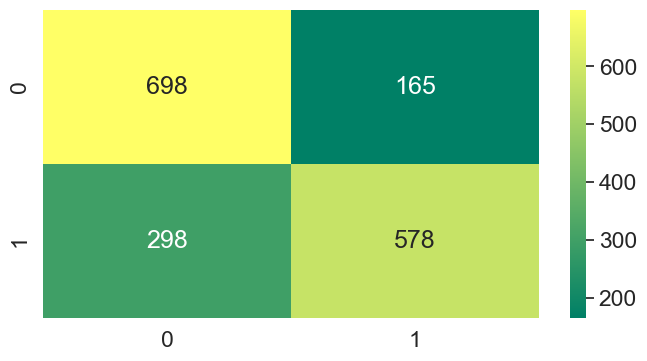

In [119]:
model_prediction(GaussianNB())

In [122]:
def model_prediction(model):
    model.fit(x_train , y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train , x_train_pred)*100
    b = accuracy_score(y_test , x_test_pred)*100
    training_score.append(a)
    training_score.append(b)

    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test , x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm , annot=True , fmt="g" , cmap="summer")
    plt.show()

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 98.53321829163072
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 74.00805060379528

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.7414578587699316
Recall Score of DecisionTreeClassifier() model is: 0.7431506849315068
F1 Score of DecisionTreeClassifier() model is: 0.74230330672748

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


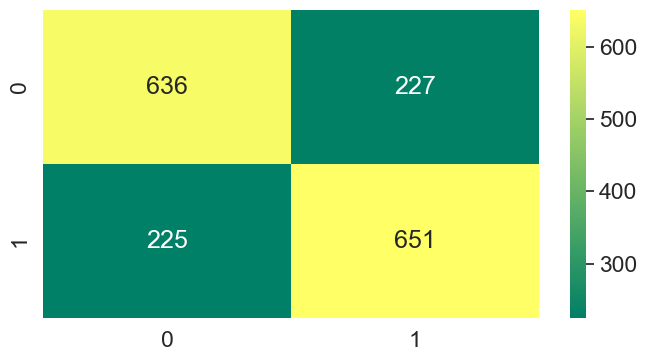

In [123]:
model_prediction(DecisionTreeClassifier())

Accuracy_Score of RandomForestClassifier() model on Training Data is: 98.53321829163072
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 80.448533640023

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.8276283618581907
Recall Score of RandomForestClassifier() model is: 0.7728310502283106
F1 Score of RandomForestClassifier() model is: 0.7992916174734357

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


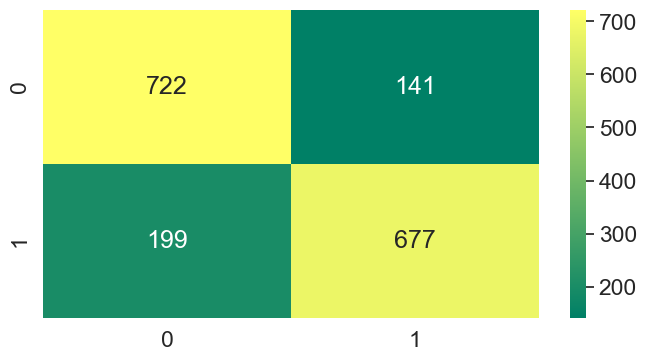

In [124]:
model_prediction(RandomForestClassifier())

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 78.5878631003739
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 77.97584818861415

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.7723756906077348
Recall Score of AdaBoostClassifier() model is: 0.797945205479452
F1 Score of AdaBoostClassifier() model is: 0.7849522740033689

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


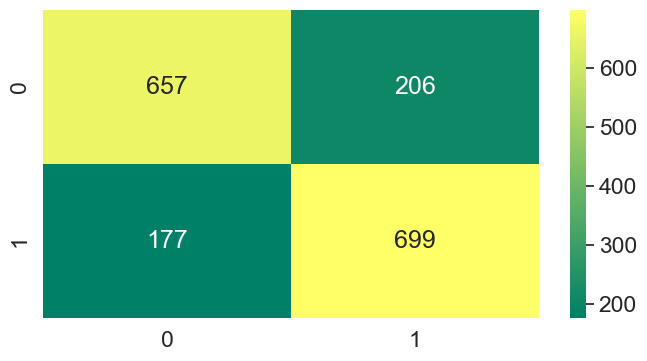

In [125]:
model_prediction(AdaBoostClassifier())

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 82.053494391717
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 79.29844738355378

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.7721518987341772
Recall Score of GradientBoostingClassifier() model is: 0.8356164383561644
F1 Score of GradientBoostingClassifier() model is: 0.8026315789473685

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


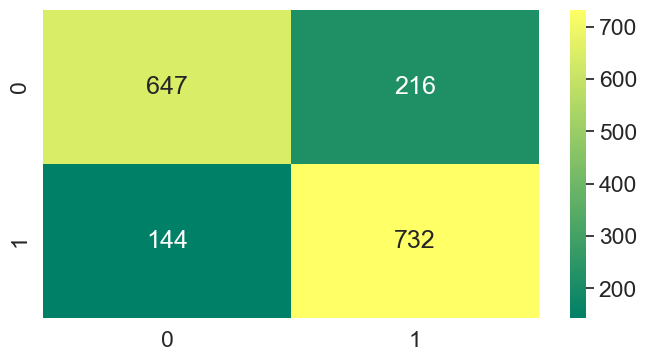

In [126]:
model_prediction(GradientBoostingClassifier())

Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x3433b2580> model on Training Data is: 87.28789186079953
Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x3433b2580> model on Testing Data is: 81.13858539390453

------------------------------------------------------------------------
Precision Score of <catboost.core.CatBoostClassifier object at 0x3433b2580> model is: 0.8030973451327433
Recall Score of <catboost.core.CatBoostClassifier object at 0x3433b2580> model is: 0.8287671232876712
F1 Score of <catboost.core.CatBoostClassifier object at 0x3433b2580> model is: 0.8157303370786517

------------------------------------------------------------------------
Confusion Matrix of <catboost.core.CatBoostClassifier object at 0x3433b2580> model is:


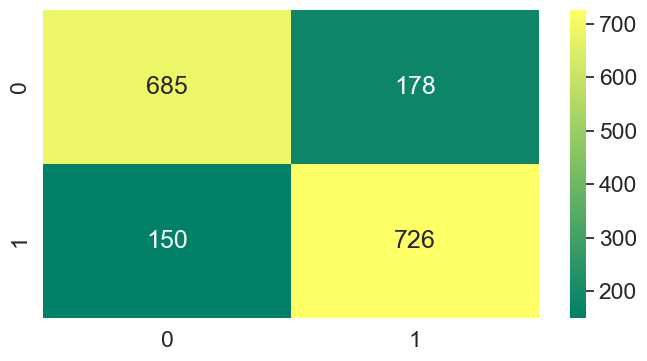

In [127]:
model_prediction(CatBoostClassifier(verbose=False))

In [133]:
model2 = CatBoostClassifier(verbose=False)

In [134]:
parameters2 = {"learning_rate":[0.1,0.3,0.5,0.6,0.7],
              "random_state":[0,42,48,50],
               "depth":[8,9,10],
               "iterations":[35,40,50]}

In [137]:
grid_search2 = GridSearchCV(model2 , parameters2 , cv=5 , n_jobs=-1)

In [138]:
grid_search2.fit(x_train , y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x342e4e850>,
             n_jobs=-1,
             param_grid={'depth': [8, 9, 10], 'iterations': [35, 40, 50],
                         'learning_rate': [0.1, 0.3, 0.5, 0.6, 0.7],
                         'random_state': [0, 42, 48, 50]})

In [139]:
grid_search2.best_score_

np.float64(0.8061551908724638)

In [140]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'depth': 8, 'iterations': 50, 'learning_rate': 0.1, 'random_state': 42}

In [141]:
model2 = CatBoostClassifier(**best_parameters2 , verbose=False)

In [142]:
model2.fit(x_train , y_train)

In [143]:
x_test_pred2 = model2.predict(x_test)
accuracy_score(y_test,x_test_pred2)

0.8010350776308223

In [144]:
model4 = RandomForestClassifier()

In [145]:
parameters4 = {'n_estimators': [100,300,500,550],
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6]}

In [146]:
grid_search4 = GridSearchCV(model4, parameters4, cv=5, n_jobs=-1)

In [147]:
grid_search4.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [100, 300, 500, 550]})

In [148]:
grid_search4.best_score_

np.float64(0.8015526328038935)

In [149]:
best_parameters4 = grid_search4.best_params_
best_parameters4

{'max_depth': 11,
 'min_samples_leaf': 4,
 'min_samples_split': 9,
 'n_estimators': 300}

In [150]:
model4 = RandomForestClassifier(**best_parameters4)

In [151]:
model4.fit(x_train , y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=4, min_samples_split=9,
                       n_estimators=300)

In [152]:
x_test_pred4 = model4.predict(x_test)

In [153]:
accuracy_score(y_test,x_test_pred4)

0.7998849913743531